# Preliminaries

In [1]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)

# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

import decimal
from decimal import Decimal

import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,MaxPooling2D # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

from pathlib import Path  

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from keras.models import load_model
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import plot_model

from sklearn.utils.class_weight import compute_sample_weight

import sys
sys.path.append("/Users/paolo/Documents/TC/Paolo/scripts/")
from aux import extract_cyclones, extract_target, find_neighbour, extract_zeros_samples, extract_images_withCenter, extract_images_all


pandas: 1.5.0
geopandas: 1.23.2
Tensorflow/Keras: 2.10.0
pandas: 1.5.0
numpy: 1.23.2
pandas: 1.5.0
geopandas: 1.23.2
Tensorflow/Keras: 2.10.0
pandas: 1.5.0
numpy: 1.23.2


# Standardized features

In [2]:
train1 = pd.read_csv('/Users/paolo/Documents/OneDrive - Politecnico di Milano/TC/features/train1.csv').drop(columns=['Unnamed: 0'])
train2 = pd.read_csv('/Users/paolo/Documents/OneDrive - Politecnico di Milano/TC/features/train2.csv').drop(columns=['Unnamed: 0'])
train3 = pd.read_csv('/Users/paolo/Documents/OneDrive - Politecnico di Milano/TC/features/train3.csv').drop(columns=['Unnamed: 0'])
train = pd.concat((train1,train2,train3),axis=0).reset_index(drop=True)


In [3]:
val = pd.read_csv('/Users/paolo/Documents/OneDrive - Politecnico di Milano/TC/features/valid.csv').drop(columns=['Unnamed: 0'])


In [4]:
test = pd.read_csv('/Users/paolo/Documents/OneDrive - Politecnico di Milano/TC/features/test.csv').drop(columns=['Unnamed: 0'])


In [5]:
train['shear'] = train.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
val['shear'] = val.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
test['shear'] = test.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)


In [6]:
# Standardizzo tutto subito con tutti i dati
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
train_std,val_std,test_std = train,val,test

# apply standardization on numerical features
train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])


In [7]:
train_cyclones = []
for day in train_std.time.unique():
    train_cyclones.append([-15,62.5,day])
train_cyclones

[[-15, 62.5, '1980-01-01'],
 [-15, 62.5, '1980-01-02'],
 [-15, 62.5, '1980-01-03'],
 [-15, 62.5, '1980-01-04'],
 [-15, 62.5, '1980-01-05'],
 [-15, 62.5, '1980-01-06'],
 [-15, 62.5, '1980-01-07'],
 [-15, 62.5, '1980-01-08'],
 [-15, 62.5, '1980-01-09'],
 [-15, 62.5, '1980-01-10'],
 [-15, 62.5, '1980-01-11'],
 [-15, 62.5, '1980-01-12'],
 [-15, 62.5, '1980-01-13'],
 [-15, 62.5, '1980-01-14'],
 [-15, 62.5, '1980-01-15'],
 [-15, 62.5, '1980-01-16'],
 [-15, 62.5, '1980-01-17'],
 [-15, 62.5, '1980-01-18'],
 [-15, 62.5, '1980-01-19'],
 [-15, 62.5, '1980-01-20'],
 [-15, 62.5, '1980-01-21'],
 [-15, 62.5, '1980-01-22'],
 [-15, 62.5, '1980-01-23'],
 [-15, 62.5, '1980-01-24'],
 [-15, 62.5, '1980-01-25'],
 [-15, 62.5, '1980-01-26'],
 [-15, 62.5, '1980-01-27'],
 [-15, 62.5, '1980-01-28'],
 [-15, 62.5, '1980-01-29'],
 [-15, 62.5, '1980-01-30'],
 [-15, 62.5, '1980-01-31'],
 [-15, 62.5, '1980-02-01'],
 [-15, 62.5, '1980-02-02'],
 [-15, 62.5, '1980-02-03'],
 [-15, 62.5, '1980-02-04'],
 [-15, 62.5, '1980-0

In [8]:
%%time
train_images_ones = extract_images_withCenter(train_std, train_cyclones, variables=[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear'], x_extension=51, y_extension=25, scale=2.5, verbose=True)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
CPU times: user 5min 25s, sys: 29.6 s, total: 5min 54s
Wall time: 6min 11s


In [76]:
%%time
train_images_smaller = extract_images_withCenter(train_std, train_cyclones, variables=[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear'], x_extension=33, y_extension=17, scale=2.5, verbose=True)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
CPU times: user 5min 28s, sys: 29.5 s, total: 5min 57s
Wall time: 6min 20s


In [10]:
val_cyclones = []
for day in val_std.time.unique():
    val_cyclones.append([-15,62.5,day])

test_cyclones = []
for day in test_std.time.unique():
    test_cyclones.append([-15,62.5,day])


In [14]:
%%time
val_images_ones = extract_images_withCenter(val_std, val_cyclones, variables=[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear'], x_extension=51, y_extension=25, scale=2.5, verbose=True)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
CPU times: user 8.71 s, sys: 945 ms, total: 9.65 s
Wall time: 10.1 s


In [77]:
%%time
val_images_smaller = extract_images_withCenter(val_std, val_cyclones, variables=[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear'], x_extension=33, y_extension=17, scale=2.5, verbose=True)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
CPU times: user 9.09 s, sys: 869 ms, total: 9.96 s
Wall time: 10.4 s


In [38]:
%%time
test_images_ones = extract_images_withCenter(test_std, test_cyclones, variables=[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear'], x_extension=51, y_extension=25, scale=2.5, verbose=True)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
CPU times: user 8.3 s, sys: 468 ms, total: 8.77 s
Wall time: 9.13 s


In [88]:
%%time
test_images_smaller = extract_images_withCenter(test_std, test_cyclones[91:], variables=[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear'], x_extension=33, y_extension=17, scale=2.5, verbose=True)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
CPU times: user 8.59 s, sys: 753 ms, total: 9.34 s
Wall time: 9.75 s


# Target images

In [16]:
train_new = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/training_sets_withrealtom.csv')
val_new = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/validation_sets_withrealtom.csv')
test_new = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/test_sets_withrealtom.csv')

train_new['target'] = train_new.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
test_new['target'] = test_new.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
val_new['target'] = val_new.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)

y_train = train_new.loc[:,['target','latitude','longitude','time']]
y_val = val_new.loc[:,['target','latitude','longitude','time']]
y_test = test_new.loc[:,['target','latitude','longitude','time']]

In [24]:
def extract_images(df, variables, verbose=False):
    number_of_img, rows, cols = len(df.time.unique()), len(df.longitude.unique()), len(df.latitude.unique())
    images = np.zeros( (number_of_img, rows, cols, len(variables)) )
    
    df = df.sort_values(by=['time','latitude','longitude'])
    k=0
    
    for day in range(0,number_of_img):
        
        a=df.iloc[377*day:377*(day+1)]
        i=0
        for var in variables:
            images[day,:,:,i] = a.pivot(index='longitude', columns='latitude')[var]
            i+=1
        k+=1
        if (k%100==0) & (verbose==True): print(k)
    return images

In [25]:
variables = [ 'target']
y_train_img = extract_images(y_train, variables, verbose=True)
print(y_train_img.shape)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
(11323, 29, 13, 1)


In [28]:
variables = [ 'target']
y_val_img = extract_images(y_val, variables, verbose=True)
print(y_val_img.shape)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
(1826, 29, 13, 1)


In [39]:
test_images_ones.shape

(1736, 51, 25, 9)

In [34]:
variables = [ 'target']
y_test_img = extract_images(y_test.loc[(y_test.time>='2016-04-01') & (y_test.time<='2020-12-31')], variables, verbose=True)
print(y_test_img.shape)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
(1736, 29, 13, 1)


# CNN

In [67]:
model = Sequential()
model.add(layers.Input(shape=(51,25, 9)))

model.add(layers.Conv2D(8, (5,5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3,3), padding='same'))

model.add(layers.Conv2D(8, (5,5), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (5,5), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((3,2),(3,2))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 51, 25, 4)         904       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 17, 9, 4)         0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, 17, 9, 4)          404       
                                                                 
 up_sampling2d_23 (UpSamplin  (None, 34, 18, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_84 (Conv2D)          (None, 34, 18, 1)         101       
                                                                 
 cropping2d_24 (Cropping2D)  (None, 29, 13, 1)       

In [72]:
model.fit(train_images_ones, y_train_img, validation_data=(val_images_ones,y_val_img),
        callbacks=[monitor],epochs=1000)

Epoch 1/1000
354/354 [==============================] - 5s 15ms/step - loss: 0.0154 - val_loss: 0.0159
Epoch 2/1000
354/354 [==============================] - 4s 10ms/step - loss: 0.0153 - val_loss: 0.0161
Epoch 3/1000
354/354 [==============================] - 4s 10ms/step - loss: 0.0153 - val_loss: 0.0158
Epoch 4/1000
354/354 [==============================] - 4s 10ms/step - loss: 0.0153 - val_loss: 0.0164
Epoch 5/1000
354/354 [==============================] - 4s 10ms/step - loss: 0.0153 - val_loss: 0.0162
Epoch 6/1000
354/354 [==============================] - 4s 10ms/step - loss: 0.0153 - val_loss: 0.0158
Epoch 7/1000
354/354 [==============================] - 4s 10ms/step - loss: 0.0153 - val_loss: 0.0162
Epoch 8/1000
354/354 [==============================] - 4s 10ms/step - loss: 0.0152 - val_loss: 0.0159
Epoch 9/1000
354/354 [==============================] - 4s 10ms/step - loss: 0.0152 - val_loss: 0.0162
Epoch 10/1000
354/354 [==============================] - 4s 10ms/step - l

55/55 [==============================] - 0s 5ms/step


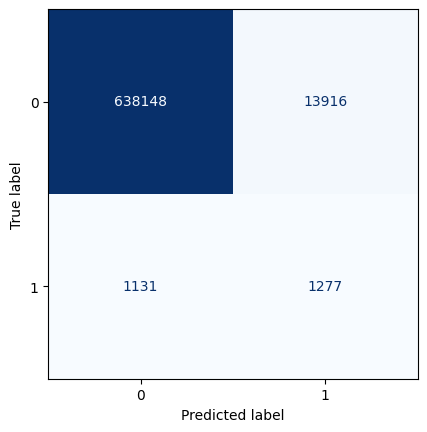

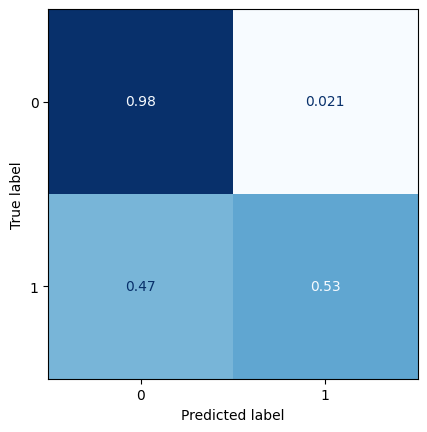

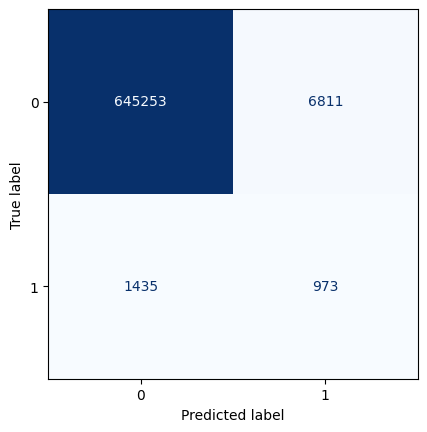

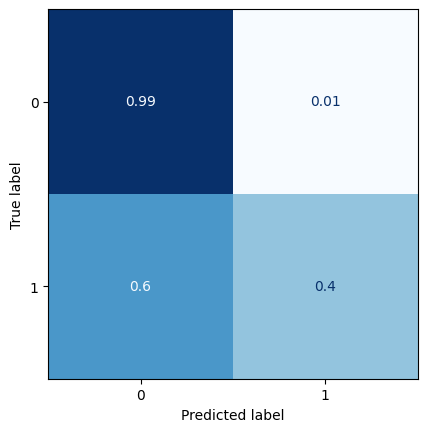

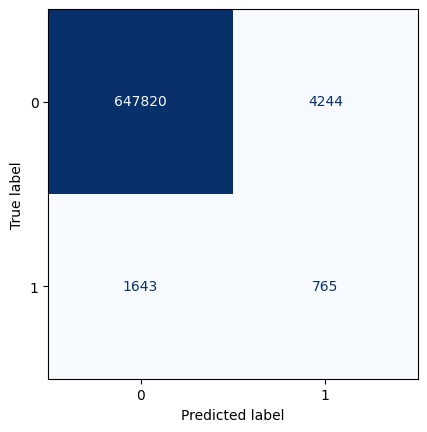

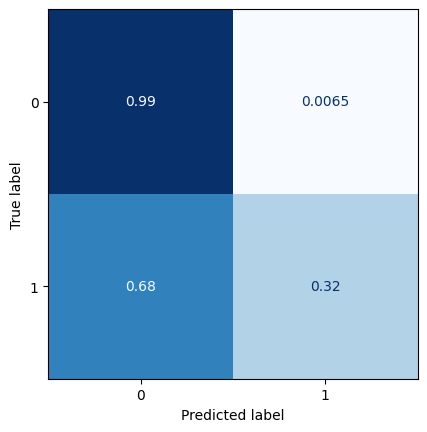

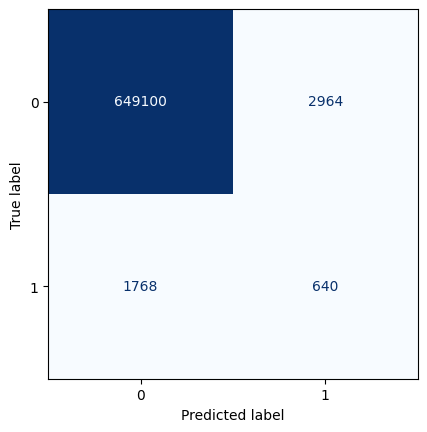

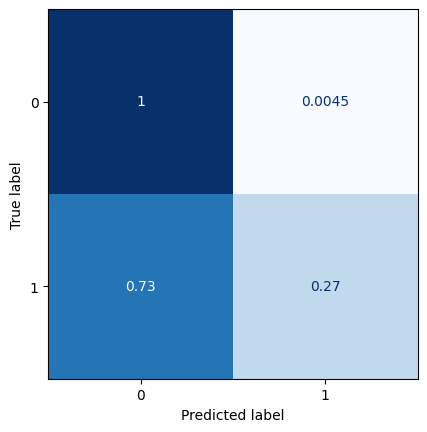

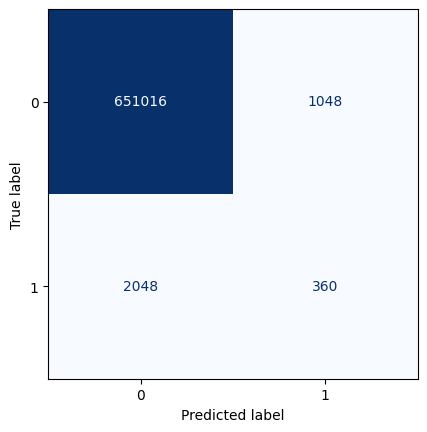

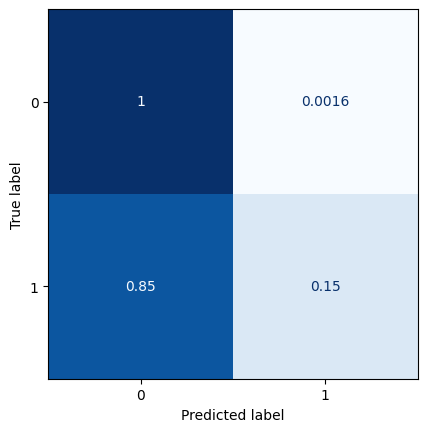

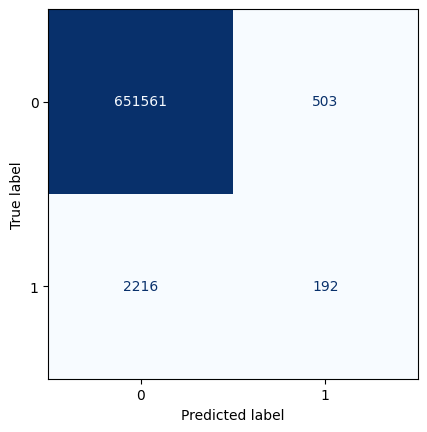

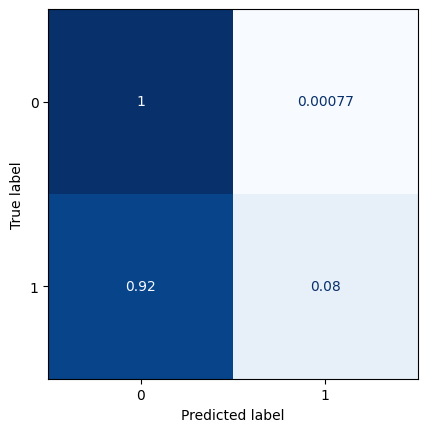

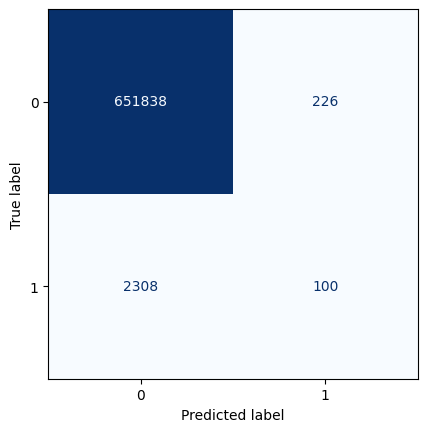

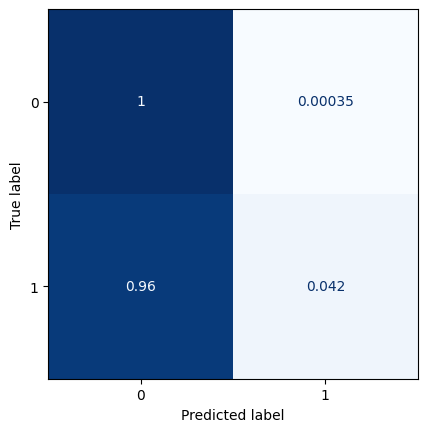

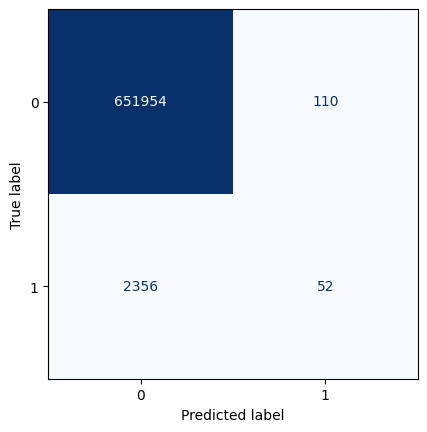

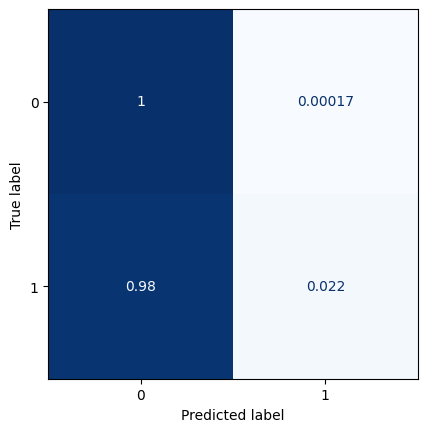

In [73]:
t = model.predict(test_images_ones)

ranges = [0.025,0.05,0.075,0.1,0.2,0.3,0.4,0.5]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

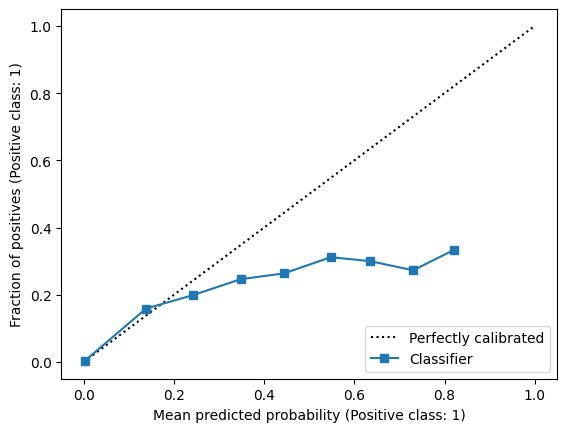

In [70]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)


In [81]:
model = Sequential()
model.add(layers.Input(shape=(33,17, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2), padding='same'))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((3,2),(3,2))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 33, 17, 8)         656       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 17, 9, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (None, 17, 9, 8)          584       
                                                                 
 up_sampling2d_26 (UpSamplin  (None, 34, 18, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 34, 18, 1)         73        
                                                                 
 cropping2d_27 (Cropping2D)  (None, 29, 13, 1)       

In [82]:
model.fit(train_images_smaller, y_train_img, validation_data=(val_images_smaller,y_val_img),
        callbacks=[monitor],epochs=1000)

Epoch 1/1000


2023-03-03 14:23:48.852500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0313

2023-03-03 14:23:52.372791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 4s 10ms/step - loss: 0.0313 - val_loss: 0.0207
Epoch 2/1000
354/354 [==============================] - 3s 8ms/step - loss: 0.0221 - val_loss: 0.0190
Epoch 3/1000
354/354 [==============================] - 3s 8ms/step - loss: 0.0208 - val_loss: 0.0183
Epoch 4/1000
354/354 [==============================] - 3s 8ms/step - loss: 0.0201 - val_loss: 0.0179
Epoch 5/1000
354/354 [==============================] - 3s 8ms/step - loss: 0.0198 - val_loss: 0.0180
Epoch 6/1000
354/354 [==============================] - 3s 8ms/step - loss: 0.0195 - val_loss: 0.0178
Epoch 7/1000
354/354 [==============================] - 3s 8ms/step - loss: 0.0193 - val_loss: 0.0178
Epoch 8/1000
354/354 [==============================] - 3s 8ms/step - loss: 0.0191 - val_loss: 0.0176
Epoch 9/1000
354/354 [==============================] - 3s 8ms/step - loss: 0.0190 - val_loss: 0.0173
Epoch 10/1000
354/354 [==============================] - 3s 8ms/step - loss: 0.0188 - val_loss

55/55 [==============================] - 0s 4ms/step


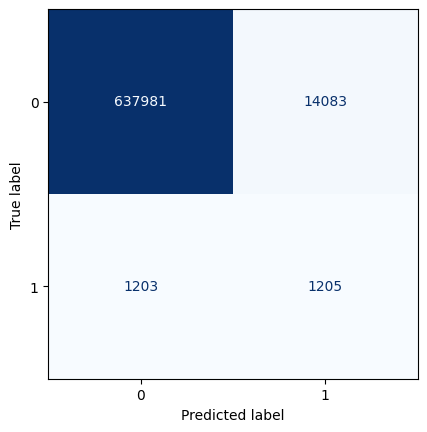

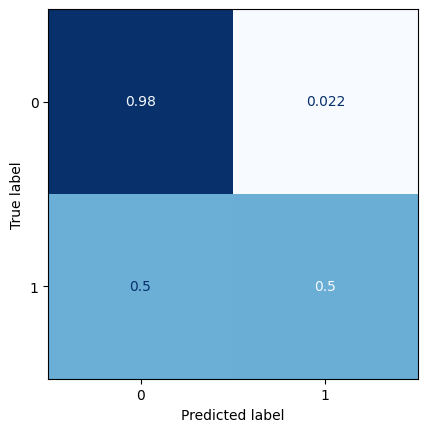

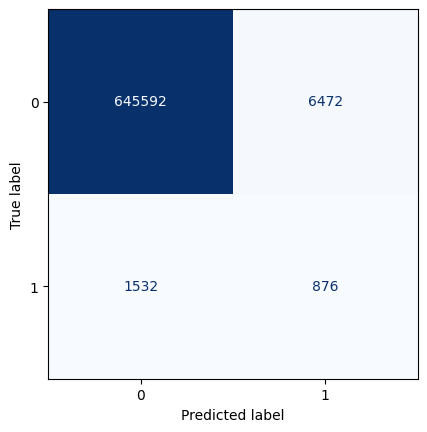

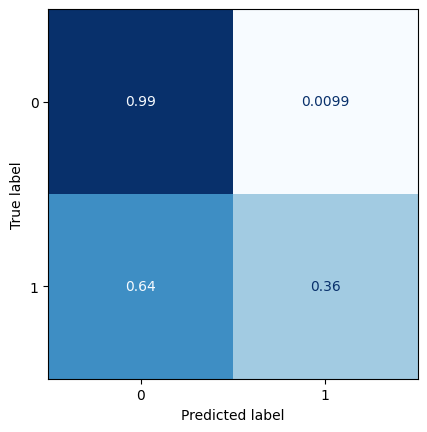

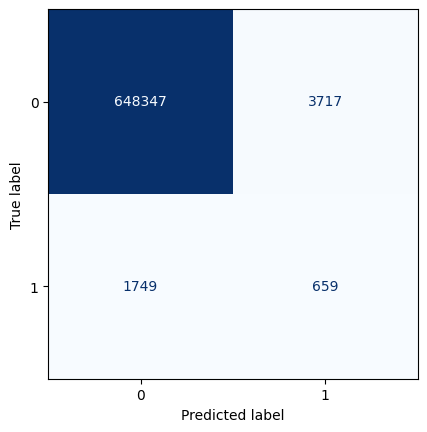

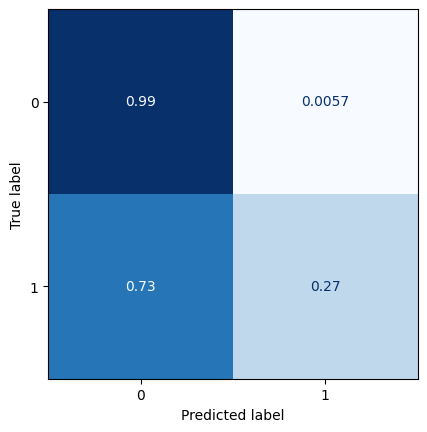

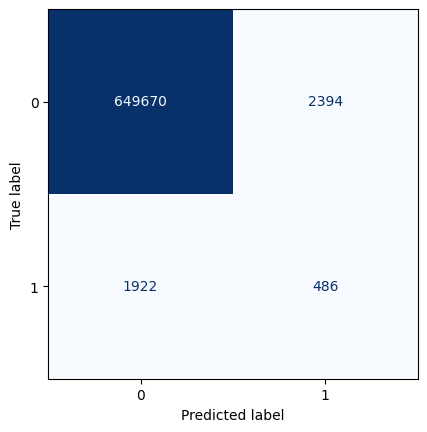

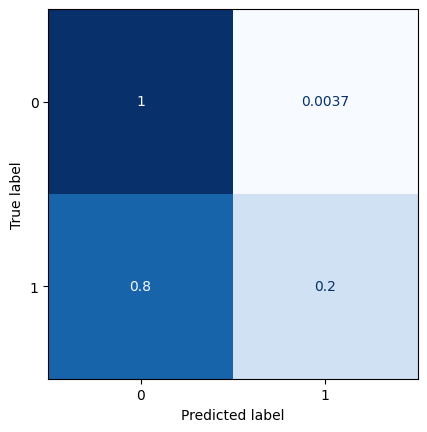

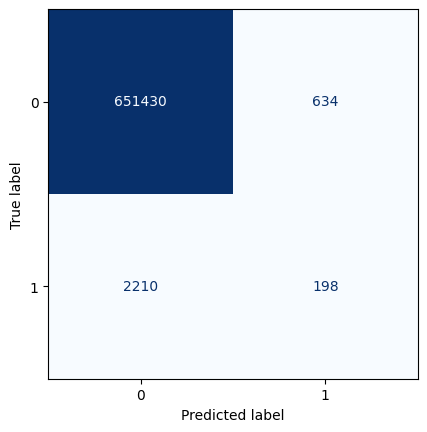

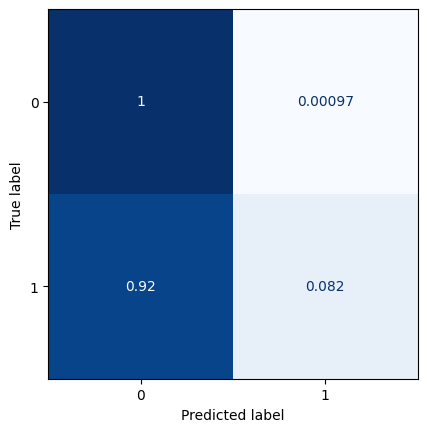

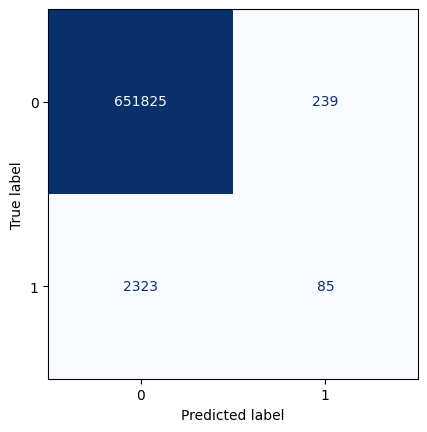

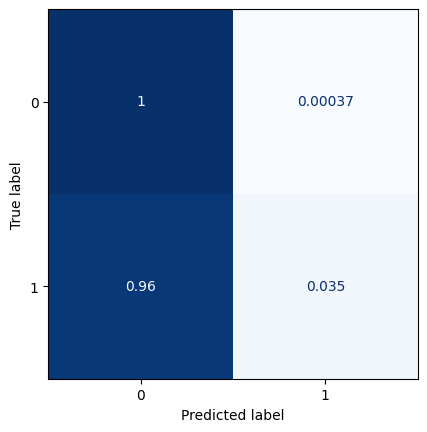

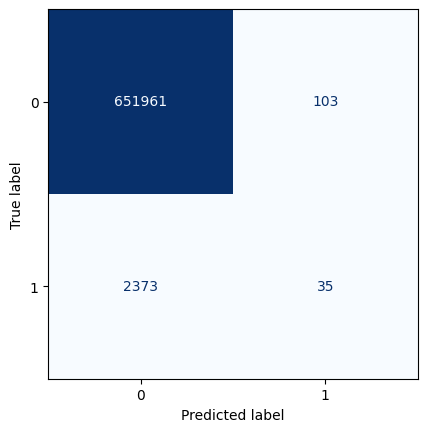

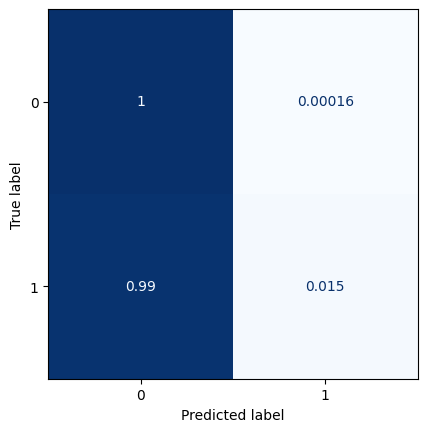

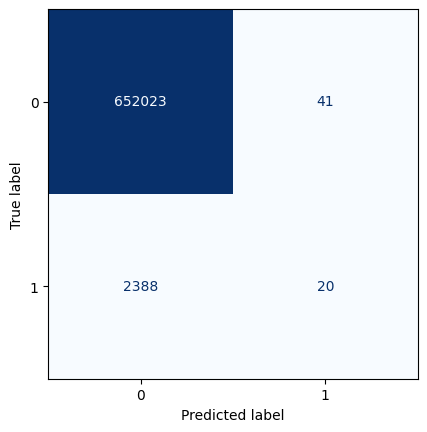

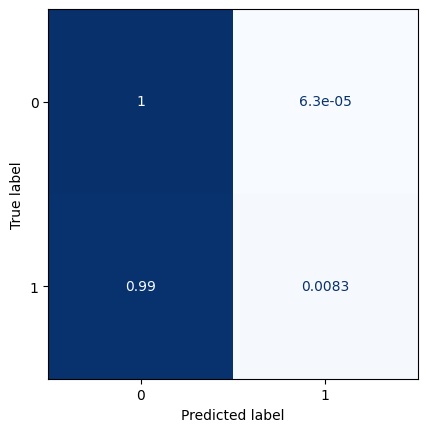

In [89]:
t = model.predict(test_images_smaller)

ranges = [0.025,0.05,0.075,0.1,0.2,0.3,0.4,0.5]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

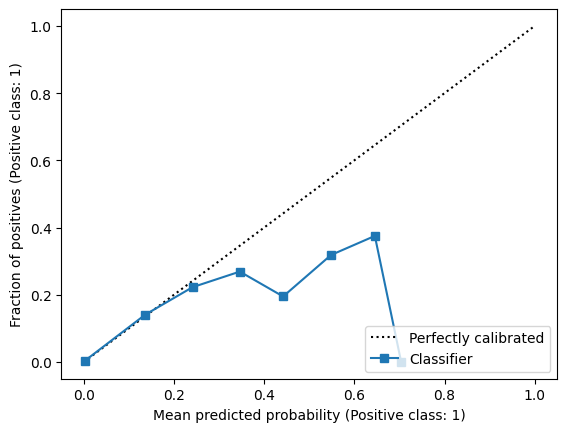

In [90]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)
